<a href="https://colab.research.google.com/github/joshbrx/biomath_model/blob/main/Voronoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polígonos de Voronoi

In [38]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random 
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.collections import LineCollection

from matplotlib.patches import Polygon

mpl.rcParams['figure.figsize'] = (14,7)

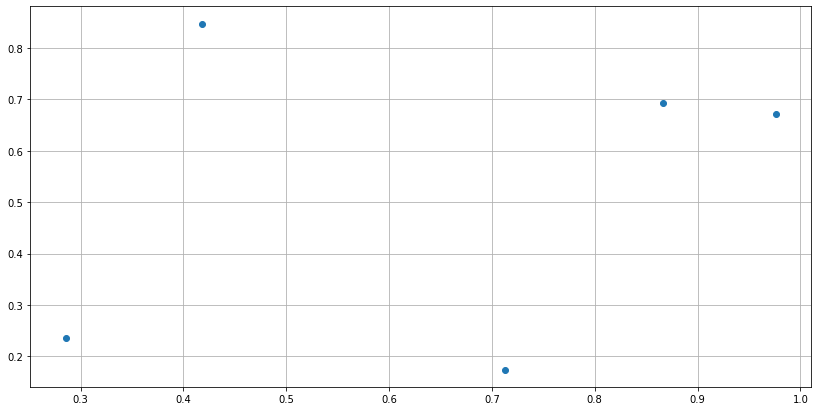

In [39]:
puntos = np.random.rand(5,2)        
plt.scatter(puntos[:,0], puntos[:,1])
plt.grid()

In [40]:
### Create Voronoi object
vor = Voronoi(puntos)

In [41]:
### Get Voronoi vertices
vor_vertices = vor.vertices
print(vor_vertices.shape)

(4, 2)


In [42]:
### Get Voronoi regions
vor_regions = vor.regions
print(vor_regions)

[[-1, 0], [], [3, 1, 2], [3, 0, -1, 1], [2, -1, 1], [3, 0, -1, 2]]


<Figure size 504x504 with 0 Axes>

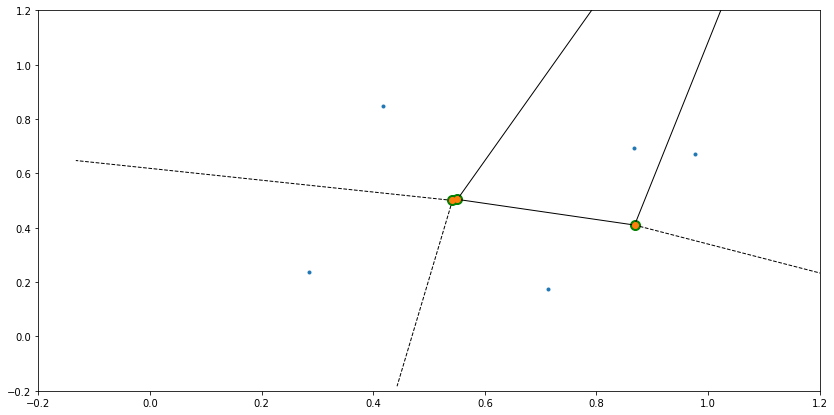

In [43]:
### Use built-in function to plot 
plt.figure(figsize=(7,7))
voronoi_plot_2d(vor)
plt.scatter(vor_vertices[:,0], vor_vertices[:,1], color="green", s=100)
plt.xlim([-0.2,1.2]); plt.ylim([-0.2,1.2])
plt.show()

In [44]:
### Get Voronoi ridge-vertices and ridge-points
print(vor.ridge_vertices)
print(vor.ridge_points)

[[-1, 0], [-1, 0], [1, 3], [1, 2], [2, 3], [-1, 1], [0, 3], [-1, 2]]
[[3 4]
 [3 0]
 [1 4]
 [1 2]
 [1 0]
 [4 2]
 [4 0]
 [2 0]]


Ahora continuamos al definir las fronteras de nuestra superficie. Como queremos que se asemeje a una estructura acinar, simulamos un medio círculo interior y exterior.

:\begin{align}
    \alpha(r, \theta) = r,\qquad\ \theta\in{\{0, \pi\}},\quad  r=\{1, 2\}
\end{align}

\begin{align}
    x &= r\cos\theta,\quad &y &= r\sin\theta\\
    \Rightarrow r &= \sqrt{x^2+y^2},\quad &\theta &= \arctan\left(\frac{y}{x}\right)
\end{align}

In [54]:
### parámetros
tol = 0.01; n_space = 200
theta = np.linspace(tol, np.pi-tol, n_space);
r = np.array([1.0 + tol, 2.0 - tol]);

### funciones
alpha_x = lambda r, theta: r*np.cos(theta);
alpha_y = lambda r, theta: r*np.sin(theta);

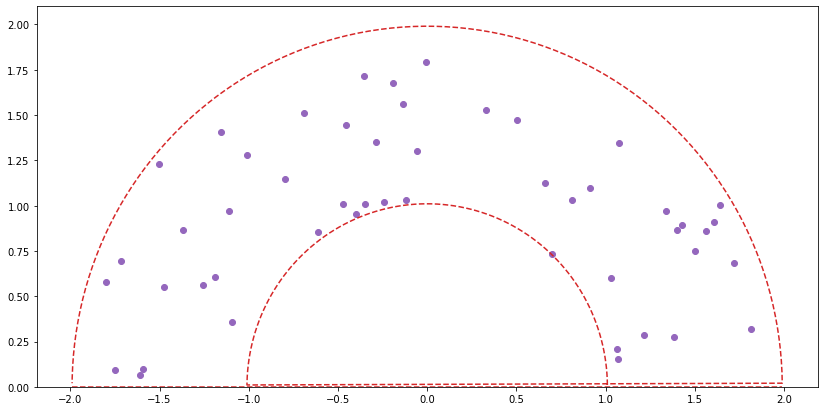

In [56]:
N = 50;
X_border, Y_border = [], []
for i in range(len(r)):
    X_border.append(alpha_x(r[i], theta))
    Y_border.append(alpha_y(r[i], theta))

X_border = np.array(X_border).flatten()
Y_border = np.array(Y_border).flatten()
pts_border = np.array([X_border, Y_border]).T

#----------------------------------------
r_rand     = np.random.rand(N) * abs(r[-1]-r[0]) + r[0]
theta_rand = np.random.rand(N) * abs(theta[-1]-theta[0]) + theta[0]

X_rand = alpha_x(r_rand, theta_rand)
Y_rand = alpha_y(r_rand, theta_rand)
pts_rand = np.array([X_rand, Y_rand]).T

#----------------------------------------
X_base = np.linspace(-r[1], r[1], n_space).flatten()
Y_base = np.zeros(n_space).flatten()
pts_base = np.array([X_base, Y_base]).T

#----------------------------------------

plt.scatter(X_rand, Y_rand, color="tab:purple")
plt.plot(X_border, Y_border, "--", color="tab:red");
plt.plot(X_base, Y_base, "--", color="tab:red"); 
plt.ylim([0.0,2.1]); plt.show()

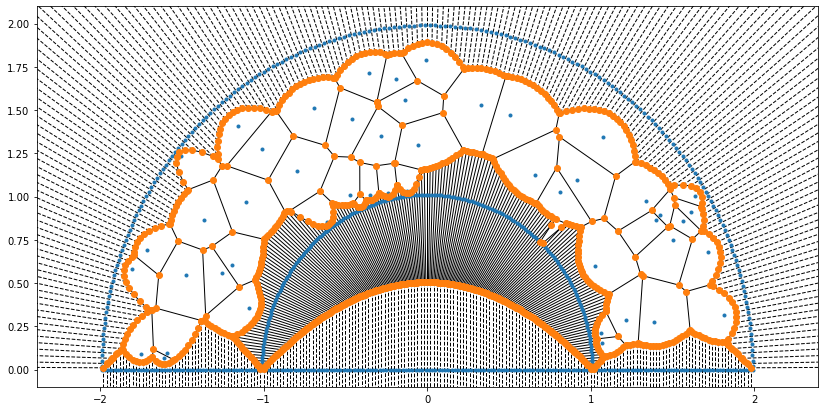

<Figure size 1080x504 with 0 Axes>

In [57]:
total = np.concatenate((pts_border, pts_rand, pts_base))
vor = Voronoi(total)
vor_vertices = vor.vertices
vor_regions = vor.regions

voronoi_plot_2d(vor)
plt.ylim([-0.1,2.1])
plt.figure(figsize=(15,7))
plt.show()

(-0.1, 2.0)

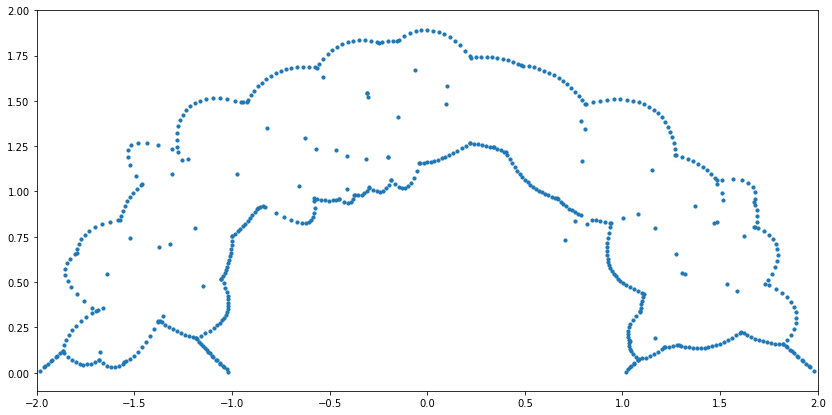

In [58]:
vor_vertices = vor_vertices[np.where(vor_vertices[:,1] >= 0)]
vor_vertices = vor_vertices[np.where(np.sqrt(vor_vertices[:,1]**2+vor_vertices[:,0]**2) >=r[0])]
vor_vertices = vor_vertices[np.where(np.sqrt(vor_vertices[:,1]**2+vor_vertices[:,0]**2) <=r[1])]
# hull = ConvexHull(vor_vertices)
plt.scatter(vor_vertices[:,0], vor_vertices[:,1], s=10)
plt.xlim([-2,2]); plt.ylim([-0.1,2])

*   ###  __Paso $N+1$:__ _Encontrando y discriminando las regiones de Voronoi_



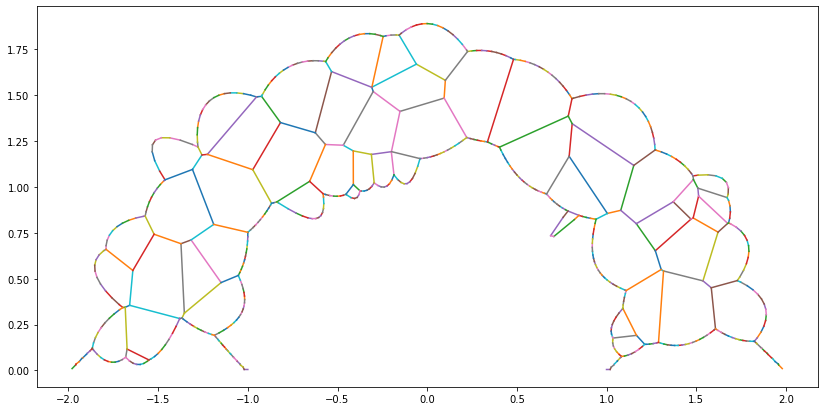

In [59]:
fig,ax = plt.subplots();

finite_segments = []
for pointidx, simplex in zip(vor.ridge_points, vor.ridge_vertices):
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        finite_segments.append(vor.vertices[simplex])

for i in range(len(finite_segments)):
    x_line = finite_segments[i][:,0]
    y_line = finite_segments[i][:,1]
    r_line = (x_line**2 + y_line**2)**(1/2)
    if (np.min(r_line)>= r[0]-tol) and (np.max(r_line)<= r[1]+tol) and (np.min(y_line) >= -0.15):
        plt.plot(x_line, y_line)

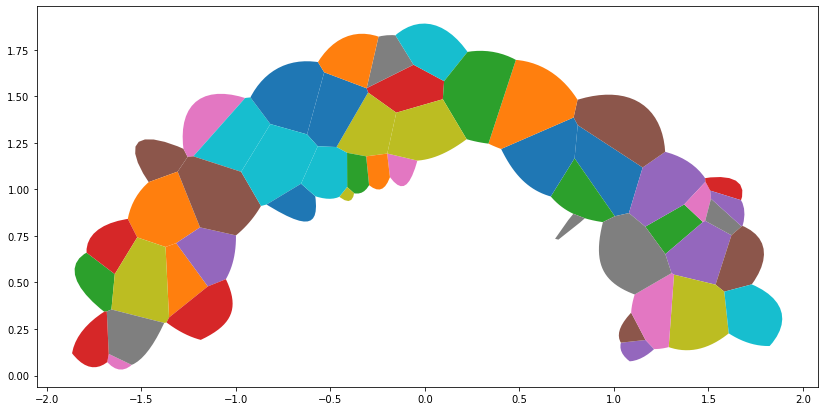

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

### make up data points
points = np.random.rand(15,2)

### compute Voronoi tesselation
vor = Voronoi(total)

### colorize
Polygons = []
for i in range(len(vor.regions)):
    if (not -1 in vor.regions[i]) and (len(vor.regions[i]) >=1):
        x_ = np.array([vor.vertices[k][0] for k in vor.regions[i]])
        y_ = np.array([vor.vertices[k][1] for k in vor.regions[i]])
        r_ = (x_**2+y_**2)**(1/2)
        if (np.min(r_) >= r[0] - tol) and (np.max(r_) <= r[1] + tol):
            polygon = np.array([vor.vertices[k] for k in vor.regions[i]])
            plt.fill(*zip(*polygon))
            Polygons.append([*zip(*polygon)])

plt.show()

In [73]:
len(Polygons)           # Número de polígonos guardados (coincide con el número de puntos dados)
# x[i] -> Polygons[i][0]
# y[i] -> Polygons[i][1]

50

*   ###  __Paso $N+2$:__ _Calculando el área y el centroide de un polígono_

\begin{align}
    A &= \frac{1}{2}\sum_{i=0}^{N-1} (x_iy_{i+1}-x_{i+1}y_i)
\end{align}

Y para el cálculo de las coordenadas del centro de masas en 2D tenemos las siguientes ecuaciones

\begin{align}
    C_x &= \frac{1}{6A}\sum_{i=0}^{N-1}(x_i+x_{i+1})(x_iy_{i+1}-x_{i+1}y_i) \\
    C_y &= \frac{1}{6A}\sum_{i=0}^{N-1}(y_i+y_{i+1})(x_iy_{i+1}-x_{i+1}y_i)
\end{align}

Para mayor información puede consultar el siguiente enlace: [Calculating the area and centroid of a polygon. By Paul Bourke](https://lexrent.eu/wp-content/uploads/torza/artikel_groep_sub_2_docs/BYZ_3_Polygon-Area-and-Centroid.pdf)

-----